# Decison Trees 

`Age`: age of the patient (years)

`BMI`: body mass index (kg/m2)

`Glucose`: glucose concentration in blood (mg/dL)

`Insulin`: insulin concentration in blood (microU/mL)

`HOMA`: homeostatic model assessment of insulin resistance (glucose times insulin)

`Leptin`: concentration of leptin - hormone of energy expenditure (ng/mL)

`Adiponectin`: concentration of adiponectin - protein regulating glucose level (micro g/mL)

`Resistin`: concentration of resistin - protein secreted by adipose tissue (ng/mL)

`MCP.1`: concentration of MCP.1 - protein that recruits monocytes to the sites of inflammation due to tissue injure or inflammation (pg/dL)

`Classification`: Healthy (1) or patient (2)

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [6]:
DATAPATH = 'data/breastCancer.csv'

data = pd.read_csv(DATAPATH)

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


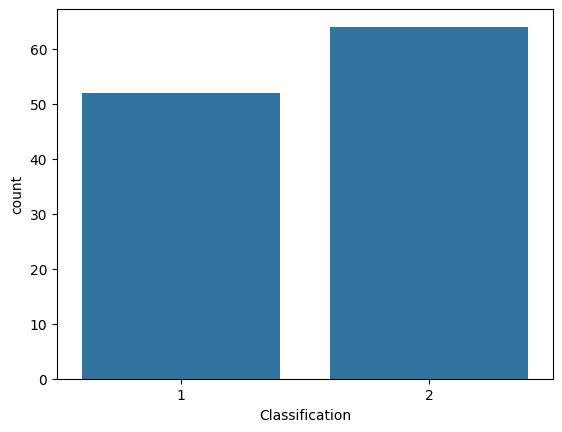

In [7]:
x = data['Classification']
ax = sns.countplot(x=x, data=data)

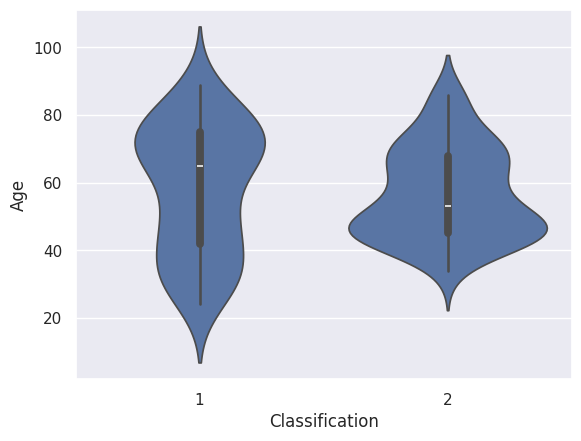

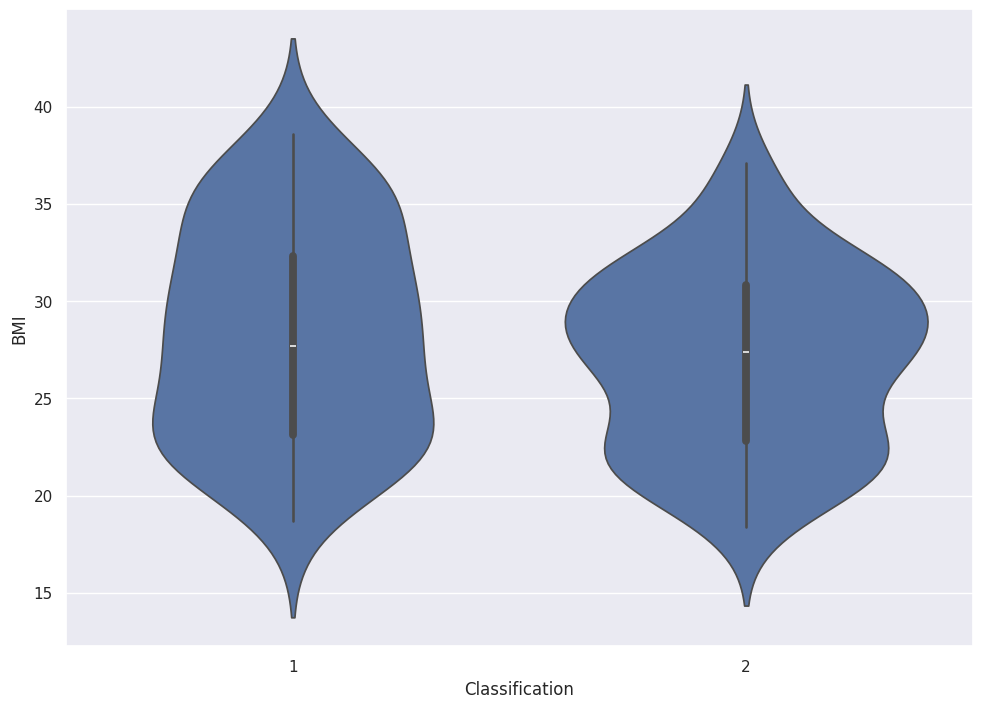

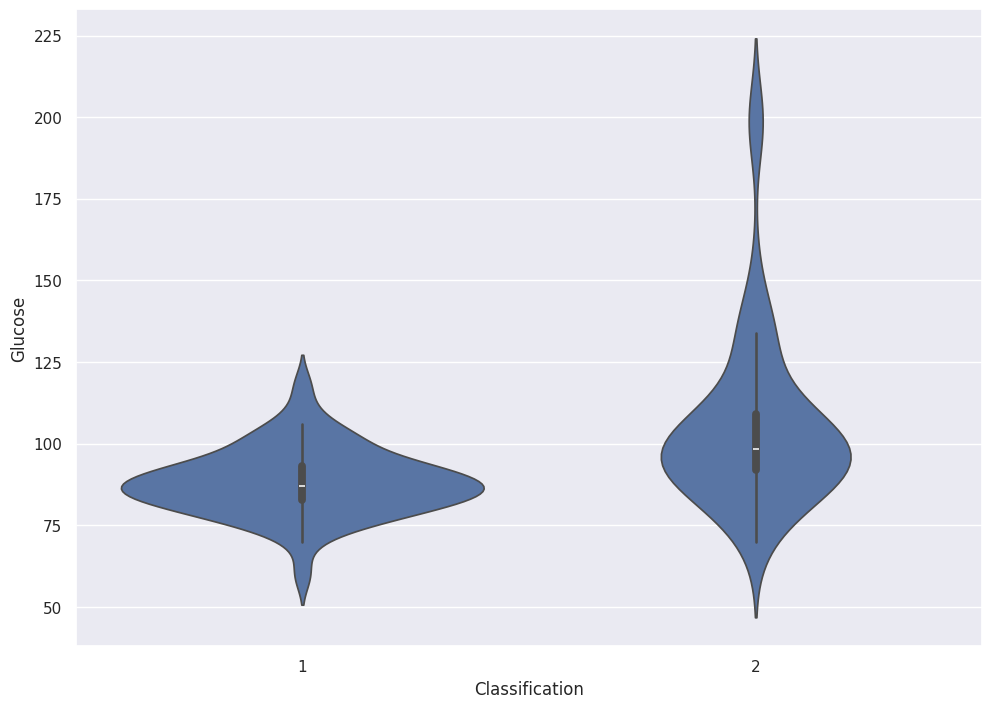

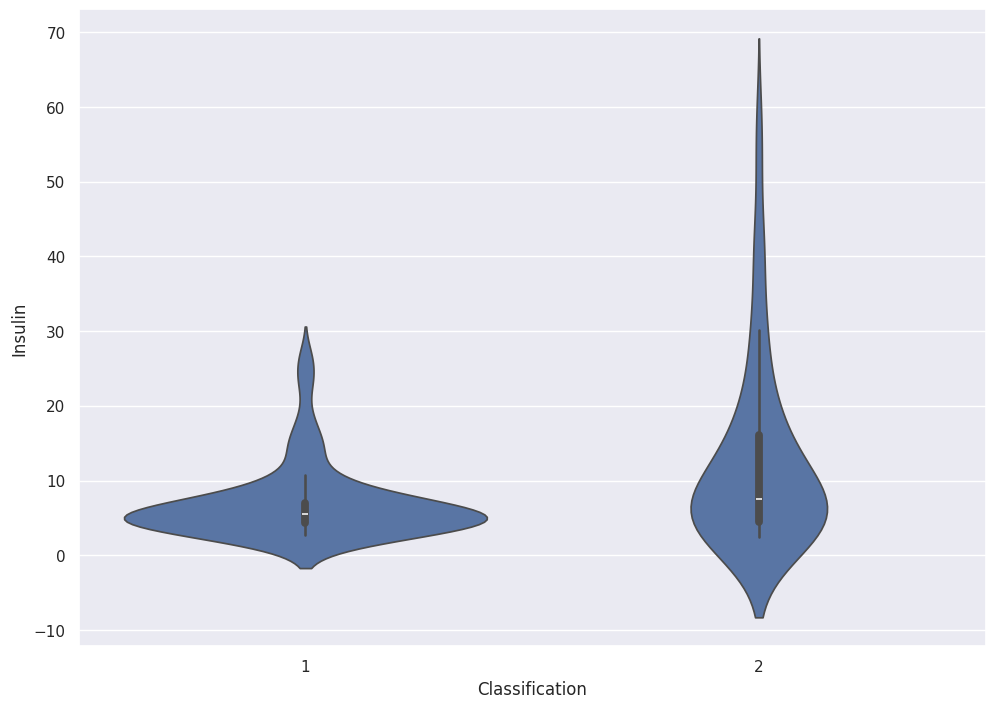

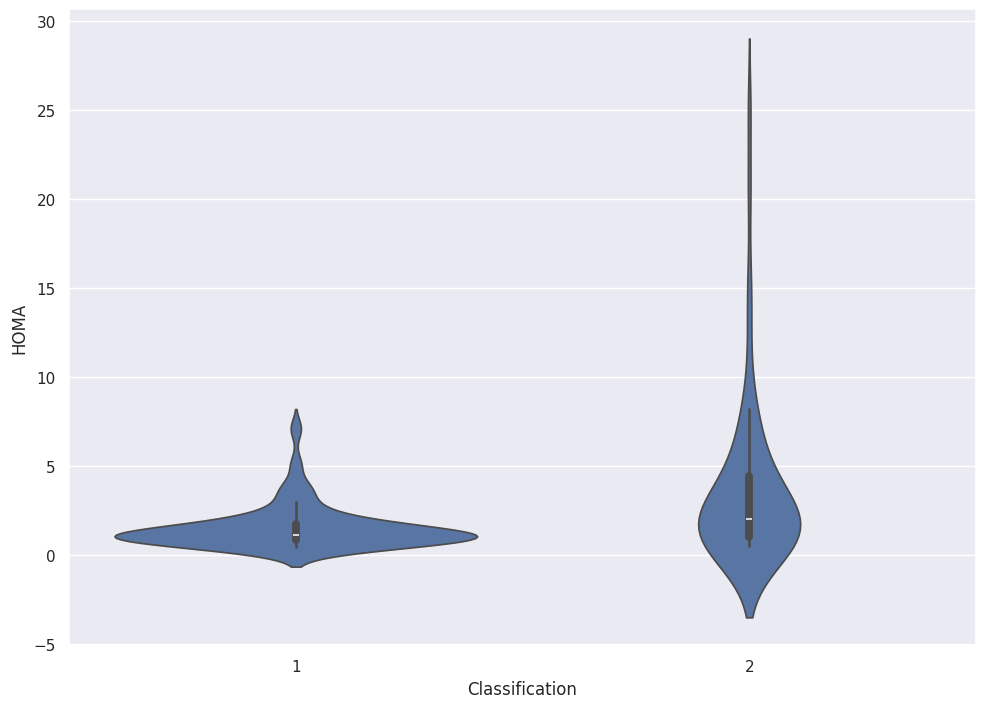

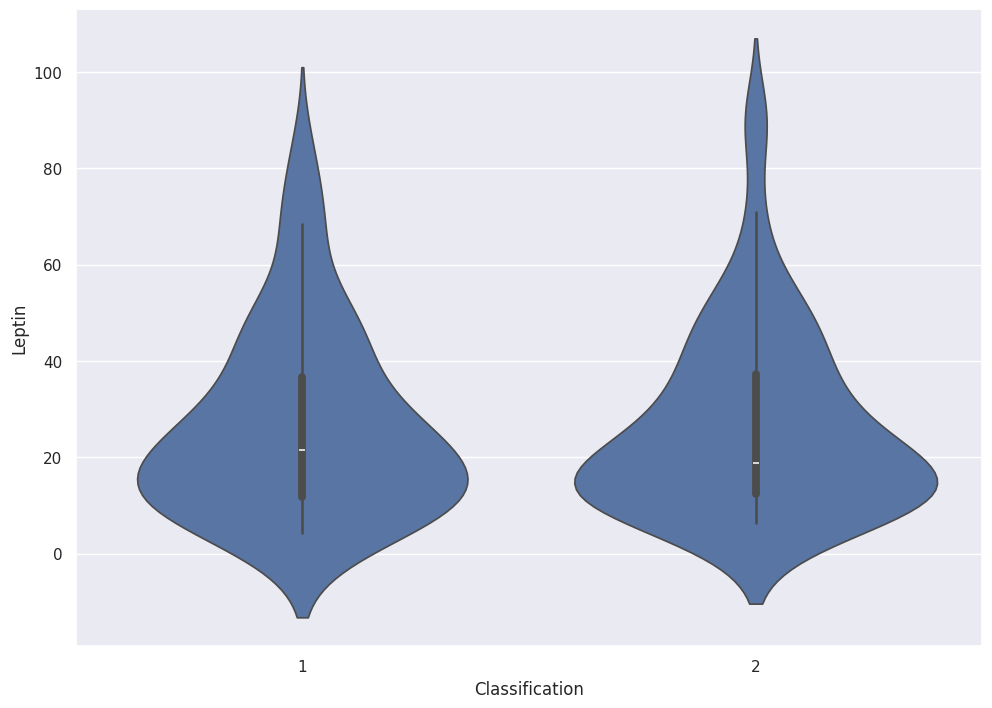

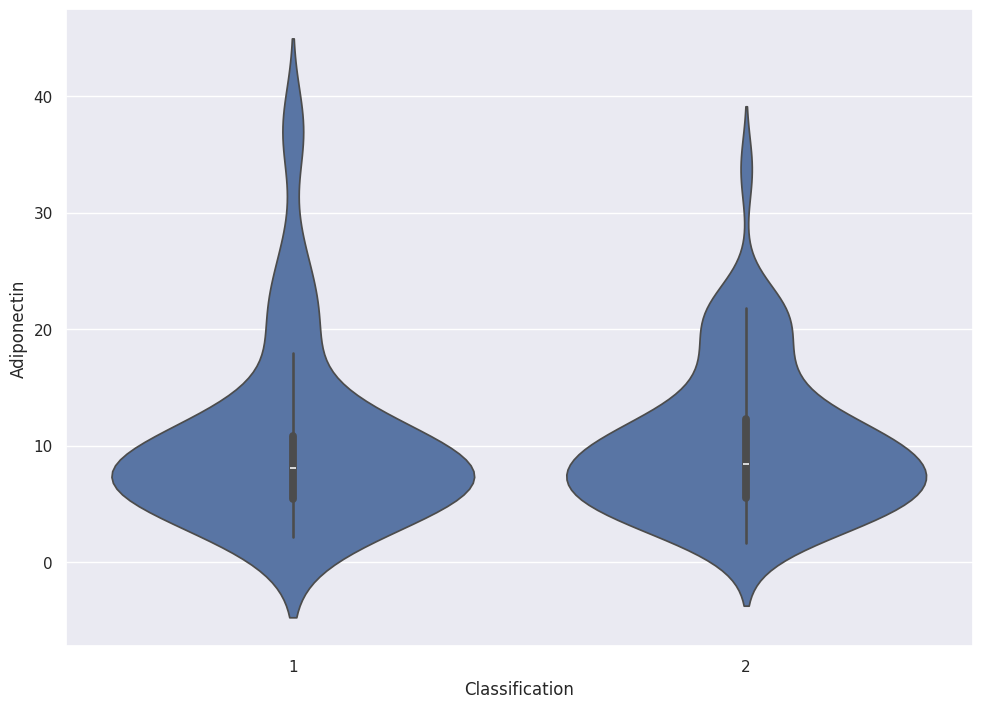

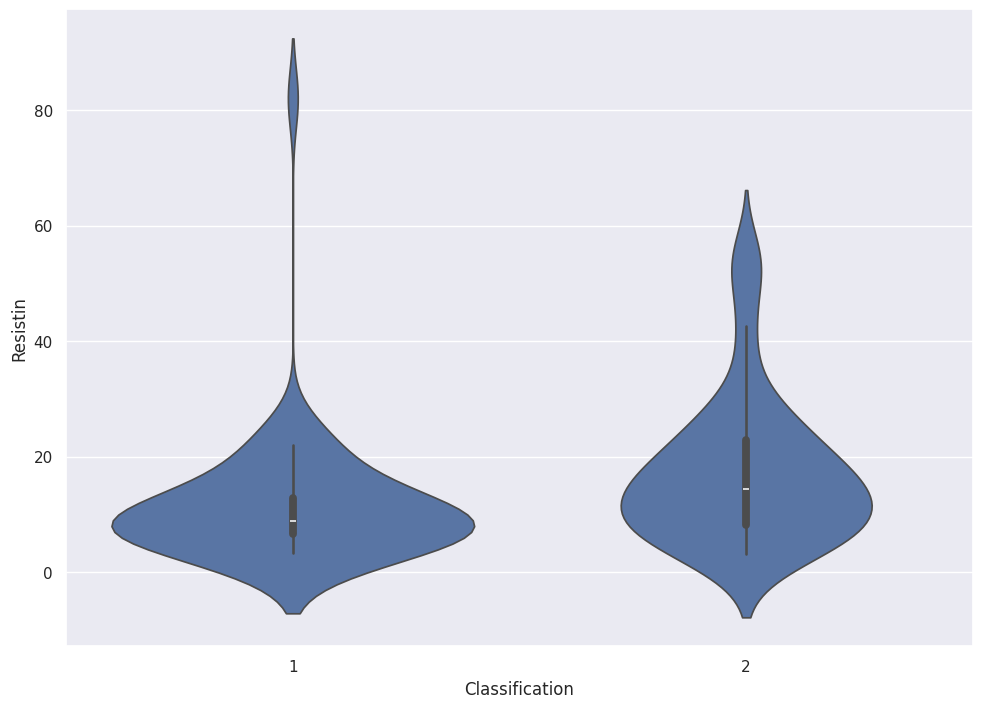

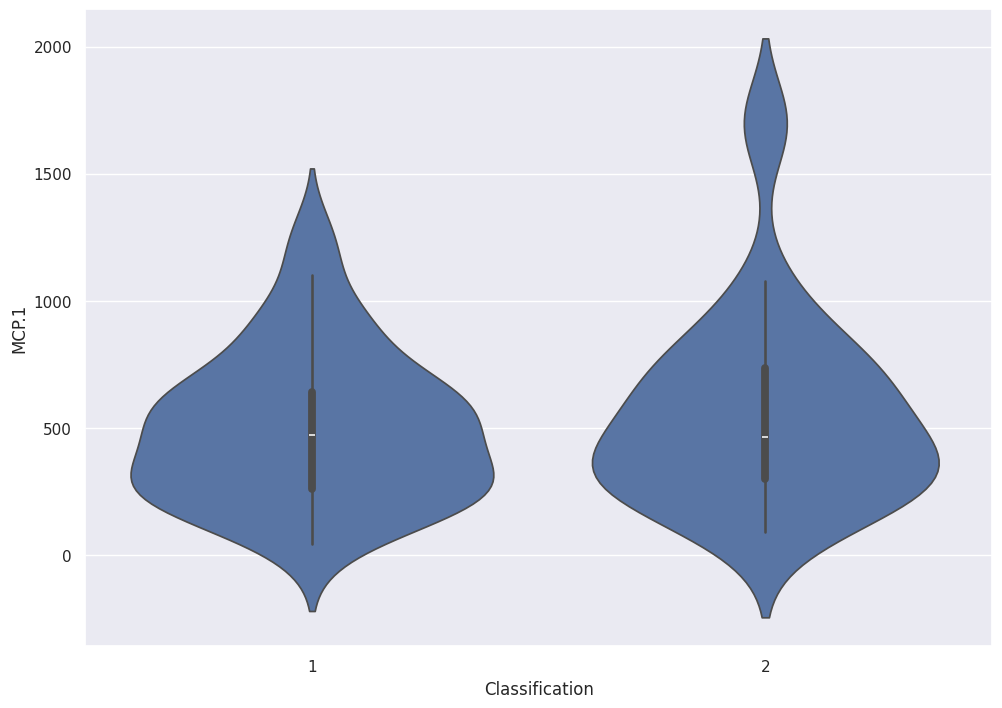

In [8]:
def violin_plots(x, y, data):
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.violinplot(x=x, y=col, data=data)

y = data.columns[:-1]
x = data.columns[-1]
        
violin_plots(x, y, data)

In [9]:
for col in data.columns:
    print(f'{col}: {data[col].isnull().sum()}')

Age: 0
BMI: 0
Glucose: 0
Insulin: 0
HOMA: 0
Leptin: 0
Adiponectin: 0
Resistin: 0
MCP.1: 0
Classification: 0


In [13]:
data["Classification"]

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64

## Preprocessing 

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


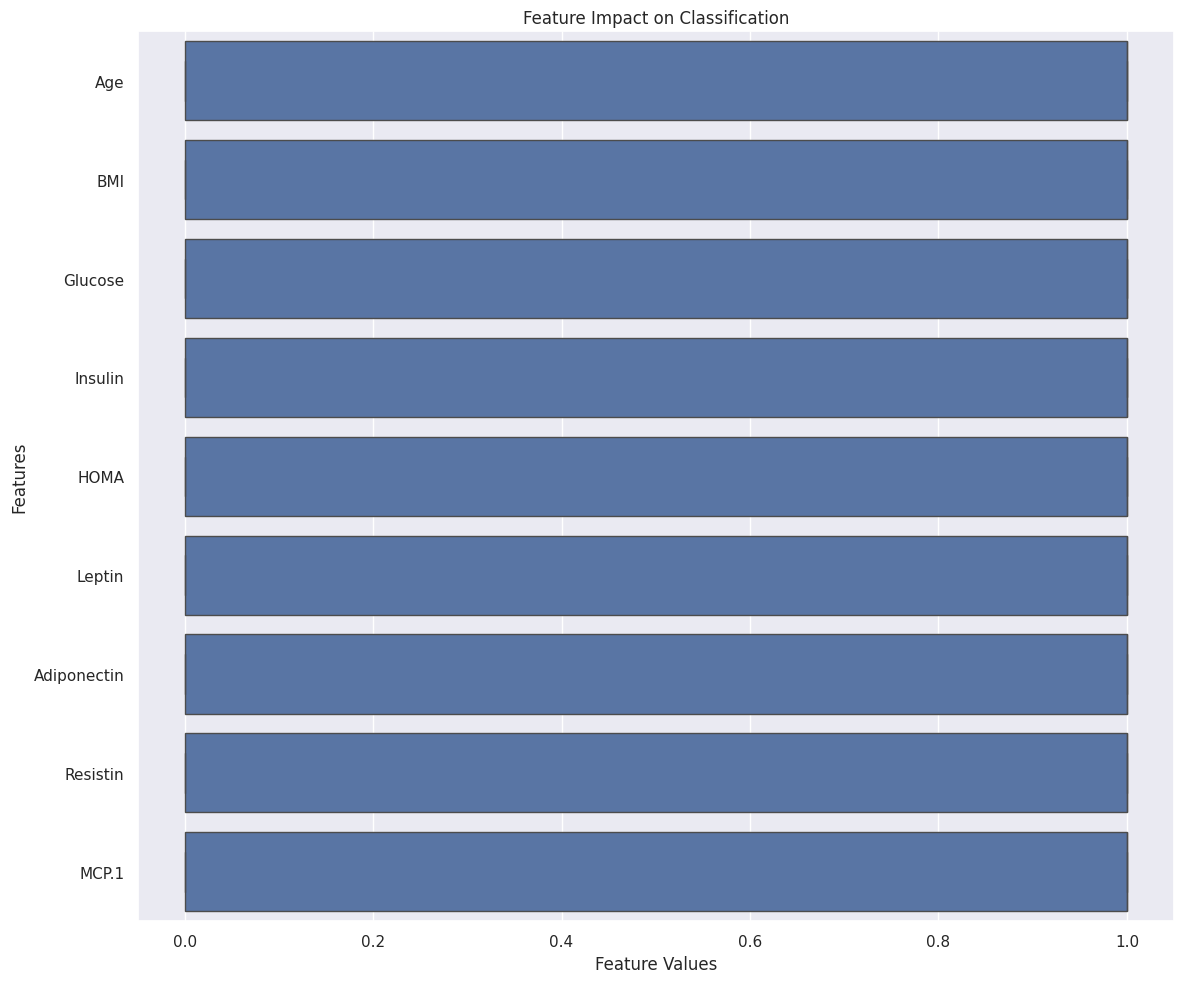

In [25]:
melted_data = data.melt(id_vars=['Classification'], var_name='Feature', value_name='Value')

# Create the boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(x='Classification', y='Feature', data=melted_data, orient='h')

plt.title('Feature Impact on Classification')
plt.xlabel('Feature Values')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [26]:
from sklearn.model_selection import train_test_split

y = data['Classification'].values.reshape(-1, 1)
X = data.drop(['Classification'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Baseline Decision Tree 

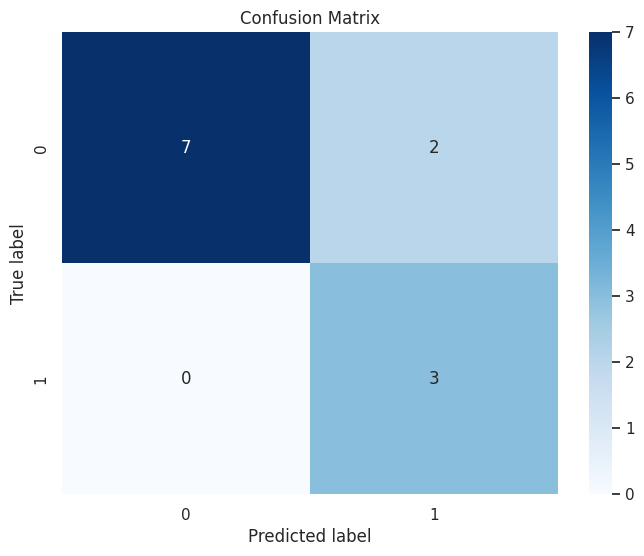

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show()

This is a confusion matrix visualization for a Decision Tree Classifier applied to breast cancer classification data. Let me explain how to read and interpret it:

## Reading the Confusion Matrix

The confusion matrix shows:
- True label (y-axis): Actual class (0 or 1)
- Predicted label (x-axis): Model's predictions (0 or 1)

The numbers in each cell represent:
- Top-left (7): True Negatives (correctly predicted 0s)
- Top-right (2): False Positives (incorrectly predicted 1s)
- Bottom-left (0): False Negatives (incorrectly predicted 0s)
- Bottom-right (3): True Positives (correctly predicted 1s)

## What's Happening

The model is making predictions on the test data, and the matrix shows its performance:
- Out of 9 cases where the true label was 0, the model correctly identified 7 and misclassified 2
- Out of 3 cases where the true label was 1, the model correctly identified all 3

## Why It's Useful

The confusion matrix is useful for several reasons:

1. **Performance Evaluation**: 
   - Shows both correct and incorrect predictions
   - Helps identify where the model is making mistakes

2. **Model Assessment**:
   - Allows calculation of important metrics:
   - Accuracy: (7+3)/(7+2+0+3) = 83.3%
   - Precision, Recall, and F1-score can also be calculated

3. **Error Analysis**:
   - Shows the types of errors (false positives vs false negatives)
   - Particularly important in medical diagnosis where different types of errors have different consequences

4. **Model Comparison**:
   - Provides a standardized way to compare different models
   - Helps in selecting the best model for the specific use case

This visualization is particularly important in medical applications like breast cancer classification, where understanding the model's errors is crucial for clinical decision-making.


[Text(0.4861111111111111, 0.9285714285714286, 'x[2] <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]'),
 Text(0.3055555555555556, 0.7857142857142857, 'x[0] <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28.0, 15.0]'),
 Text(0.39583333333333337, 0.8571428571428572, 'True  '),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3611111111111111, 0.6428571428571429, 'x[7] <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.1111111111111111, 0.35714285714285715, 'x[6] <= 7.189\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05555555555555555, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[7] <= 3.295\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.2777777777777778, 0.2142857142

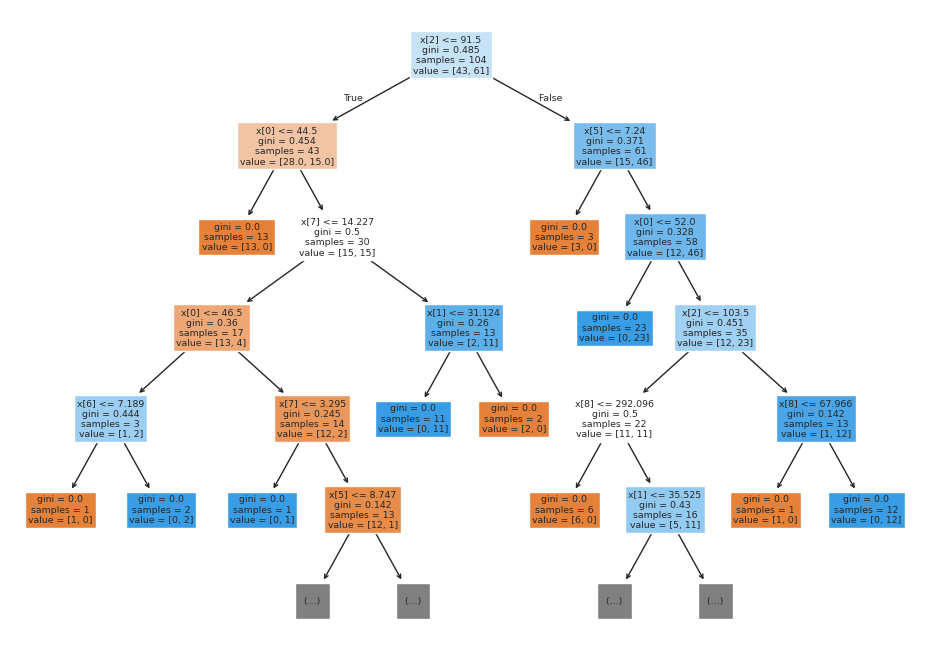

In [29]:
from sklearn.tree import plot_tree

plot_tree(clf, max_depth=5, filled=True)

## Bagging 

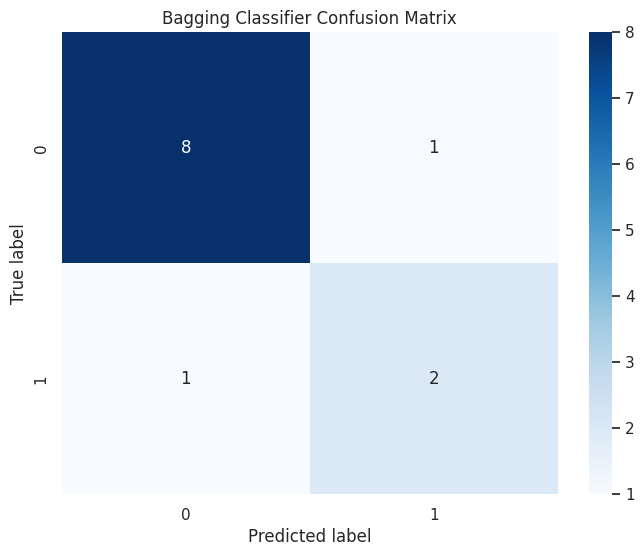

In [36]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier()
bagging_clf.fit(X_train, y_train.ravel())
y_pred_bagging = bagging_clf.predict(X_test)
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Bagging Classifier Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show()


## Random Forest Classifier 

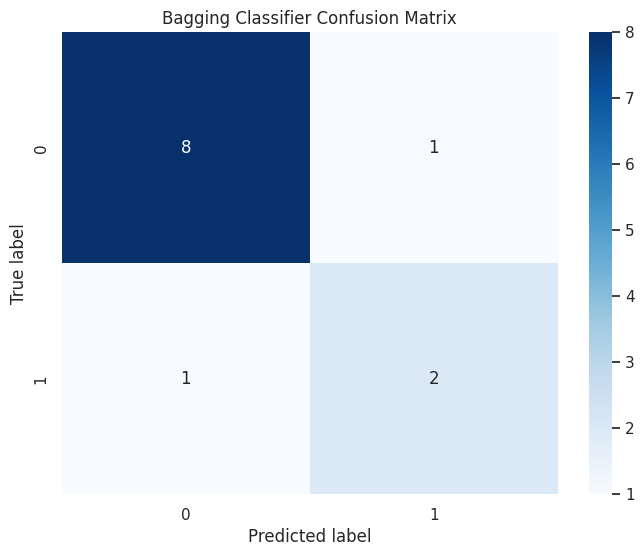

In [37]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(100)

random_clf.fit(X_train, y_train.ravel())
y_pred_bagging = bagging_clf.predict(X_test)
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Bagging Classifier Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show()

## Boosting 

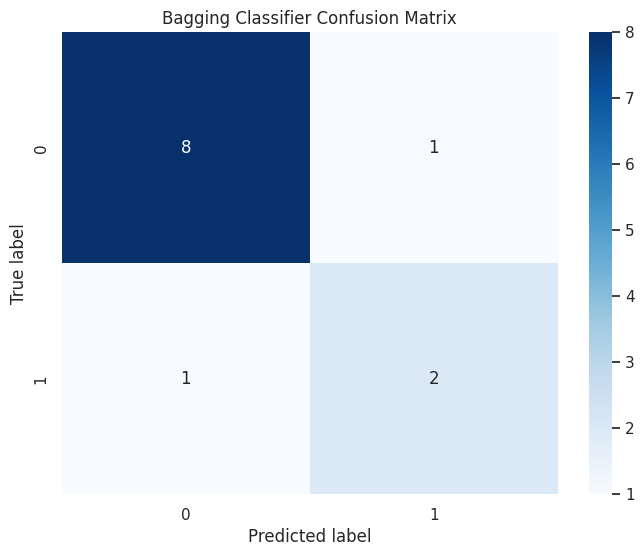

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()


boost_clf.fit(X_train, y_train.ravel())
y_pred_bagging = bagging_clf.predict(X_test)
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Bagging Classifier Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show()